# K-Nearest Neighbors Algorithm in Python and Scikit-Learn

In [ ]:
#Hide
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Hide
# Import dataset:
# Here we choose the Iris Dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

# Read dataset to pandas dataframe
iris = pd.read_csv(url, names=names)

iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Hide
# Preprocessing:
# Here we split our dataset into its attributes and labels.
# X: contains attributes
# y: labels

X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [ ]:
# Train Test Split:
# To avoid overfitting, we will devide our dataset into training and test splits. 
# Here we split our dataset into 80% train data and 20% test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
## Feature Scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training and Predictions:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Make Predictions:
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the algorithm:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 7  0  0]
 [ 0  7  1]
 [ 0  1 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

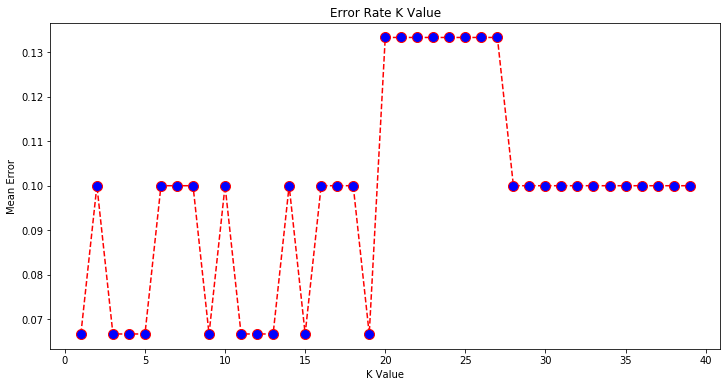

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# K-Nearest Neighbors Algorithm from scratch

In [ ]:
import random
from lambdaML.util import *
from lambdaML.knn import *

In [ ]:
# hide
# error importing, algo works. 

import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get k nearest samples
        k_idx = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_idx]

        # majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [ ]:
clf = KNN(k=3)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
acc = np.sum(pred == y_test) / len(y_test)
print(acc)

0.7333333333333333
